audio file

In [28]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import soundfile as sf
import torch
import torchaudio
import matplotlib.pyplot as plt
import sounddevice as sd
import tensorflow as tf
from pyaudioanalysis import audioBasicIO
from pyaudioanalysis import audioFeatureExtraction
import os

ModuleNotFoundError: No module named 'pyaudioanalysis'

Duration: 27.64


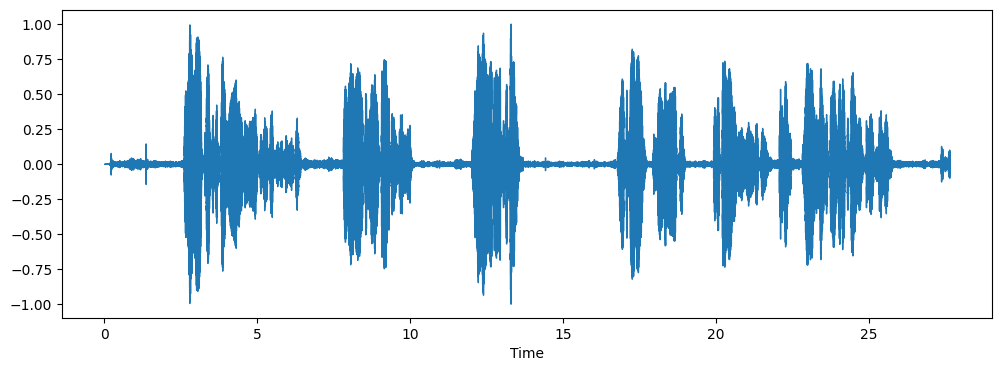

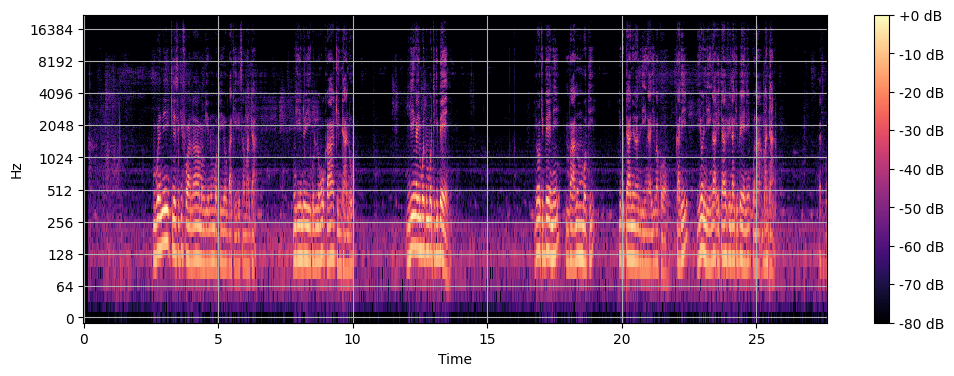

In [11]:
toyaudio = "recording-20250425-213520.wav"

y, sr = librosa.load(toyaudio, sr=None)
y = librosa.util.normalize(y)

duration = librosa.get_duration(y=y, sr=sr)
print(f"Duration: {duration:.2f}")

#waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.show()

#spectrogram
plt.figure(figsize=(12, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.grid()
plt.show()


now some attempts at acoustic unit discovery